<a href="https://colab.research.google.com/github/Pnanchahal/Customer-Churn-Analysis-EDA/blob/main/Churn_Analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the data

telco_df = pd.read_csv('/content/Customer-Churn.csv')

In [7]:
telco_df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
telco_df.Churn.value_counts()/len(telco_df)*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [10]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


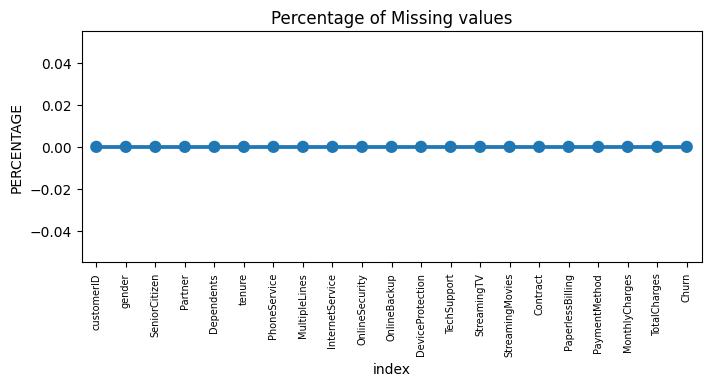

In [11]:
missing = pd.DataFrame((telco_df.isnull().sum())*100/telco_df.shape[0]).reset_index()
plt.figure(figsize=(8,3))
ax = sns.pointplot(x='index', y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [12]:
telco_df['TotalCharges'] = pd.to_numeric(telco_df['TotalCharges'], errors='coerce')

In [13]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


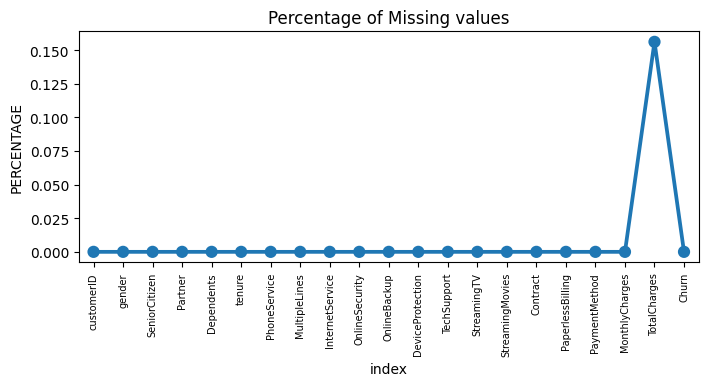

In [14]:
missing = pd.DataFrame((telco_df.isnull().sum())*100/telco_df.shape[0]).reset_index()
plt.figure(figsize=(8,3))
ax = sns.pointplot(x='index', y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

Data Cleaning

In [15]:
telco_df.tenure.value_counts()


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

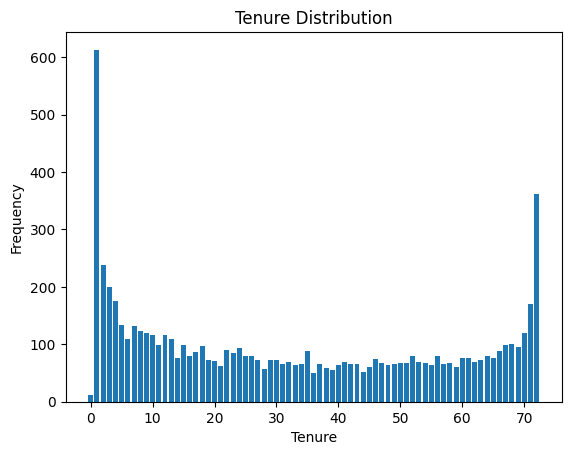

In [16]:
plt.bar(telco_df.tenure.value_counts().index, telco_df.tenure.value_counts().values)
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Tenure Distribution')
plt.show()

In [17]:
print(telco_df.tenure.max())

72


In [18]:
# Group the tenure in bins of 12 months

labels = ["{0} - {1}".format(i, i+11) for i in range(1,72,12)]
telco_df['tenure_group'] = pd.cut(telco_df.tenure, range(1,80,12), right=False, labels = labels)

In [19]:
telco_df['tenure_group'].value_counts()


1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

<Axes: >

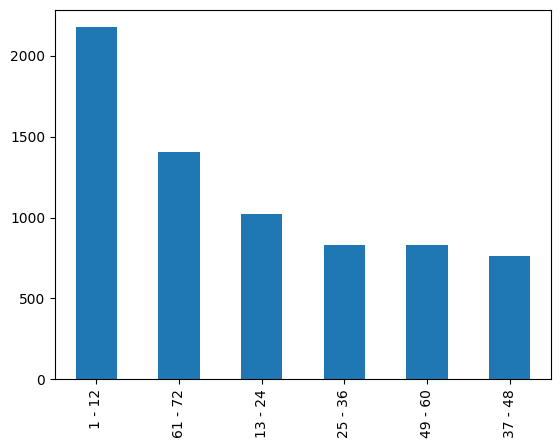

In [20]:
telco_df['tenure_group'].value_counts().plot(kind='bar')

**Data Exploration**

Univariate Analysis for Categorical data


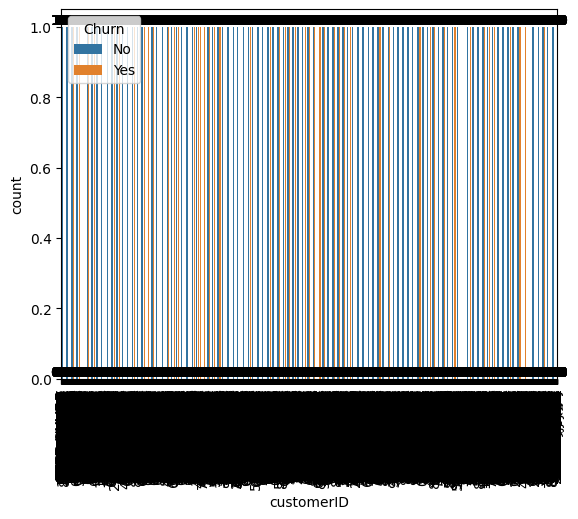

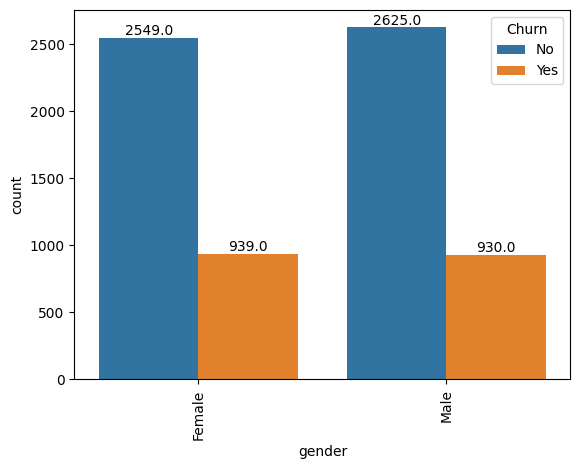

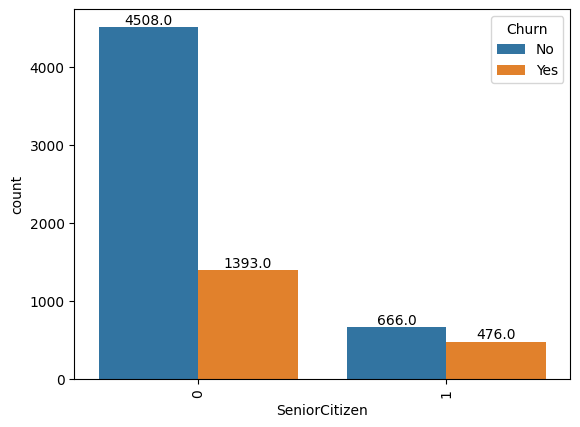

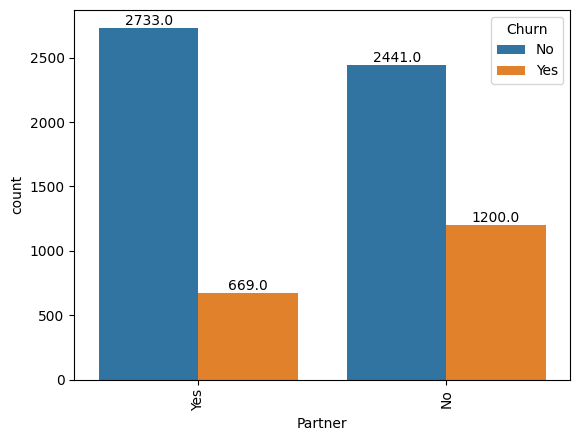

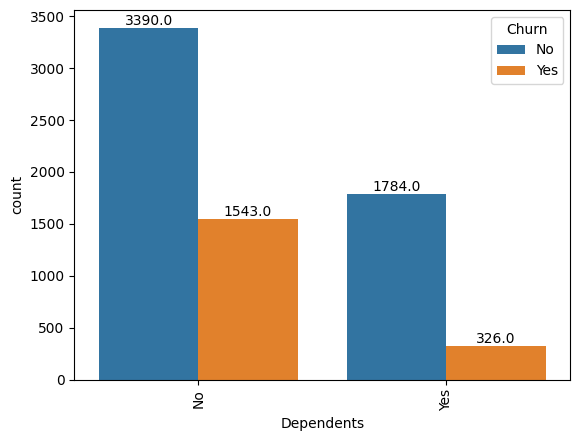

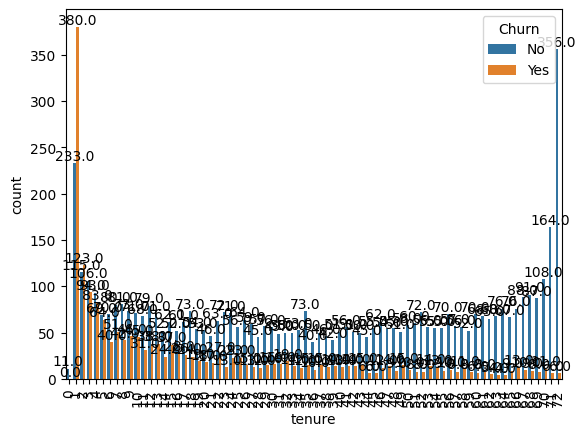

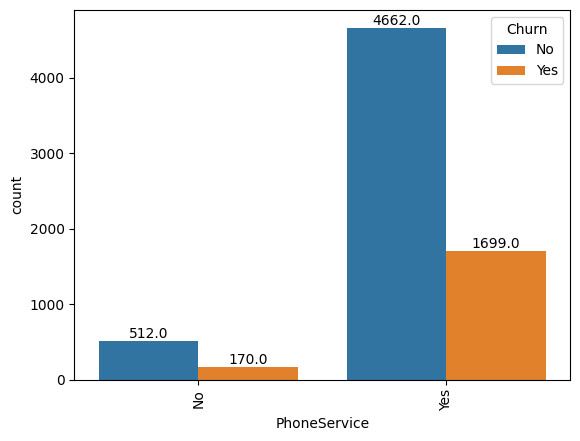

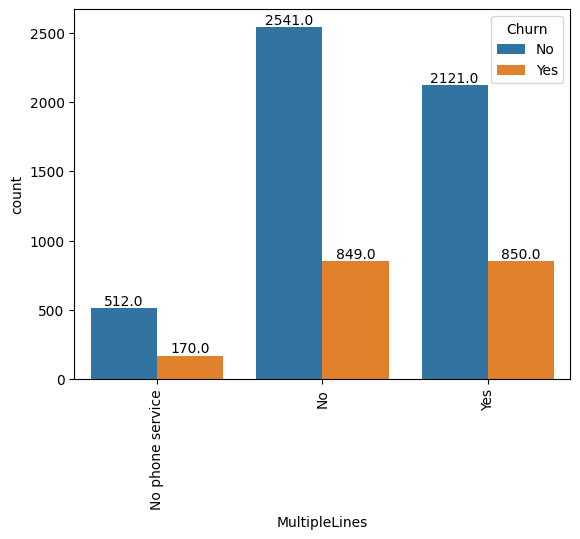

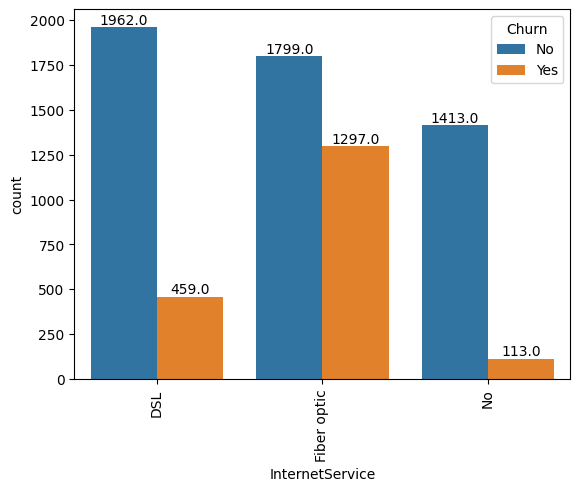

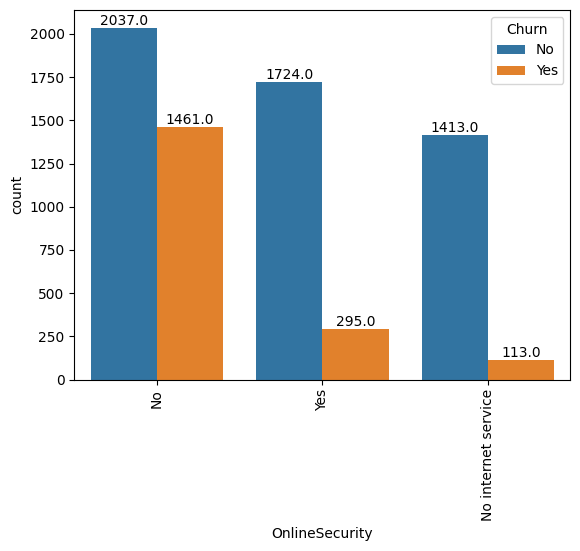

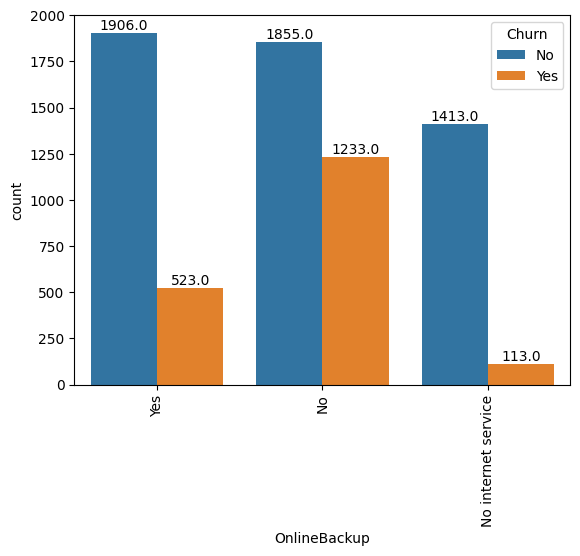

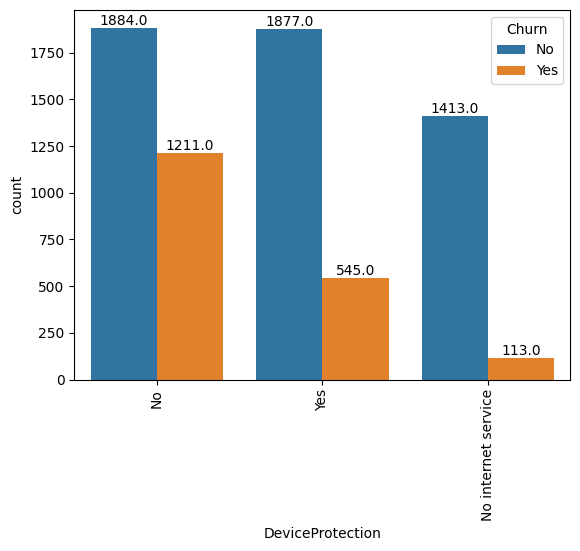

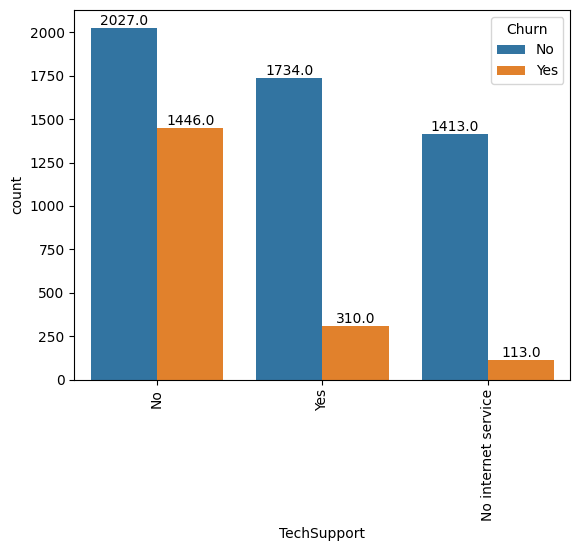

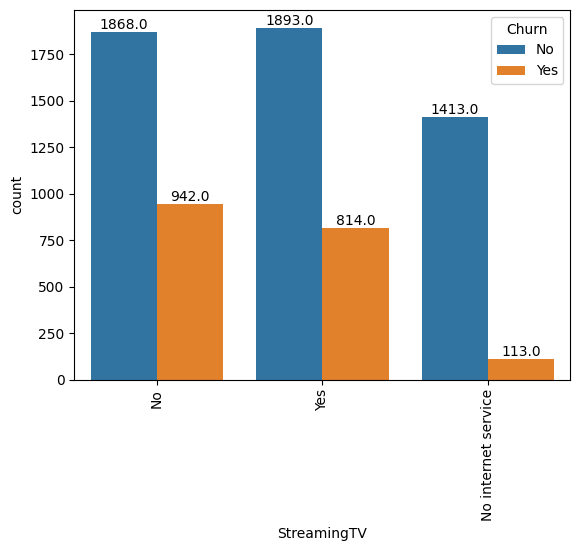

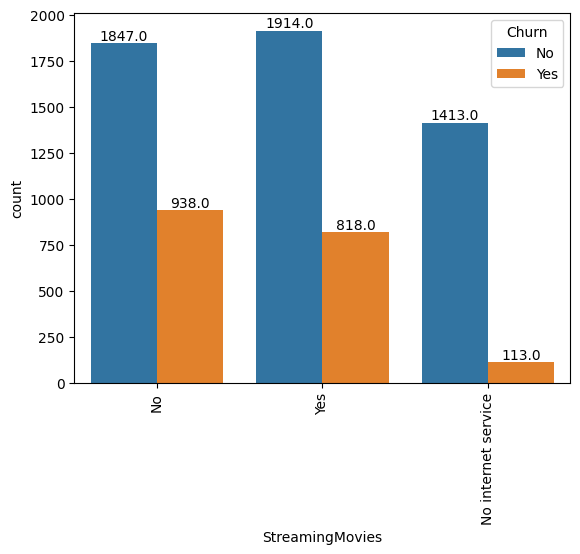

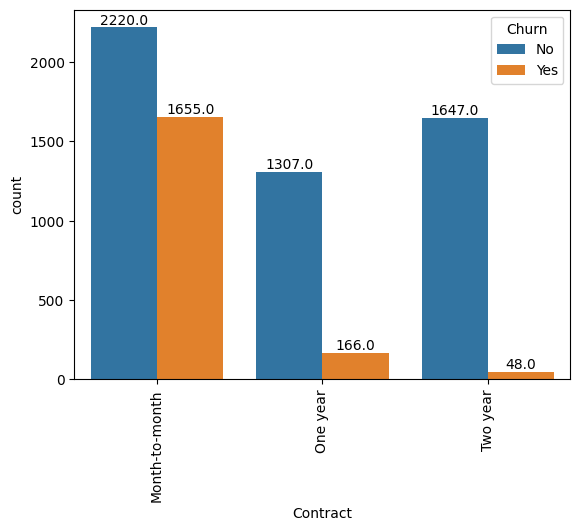

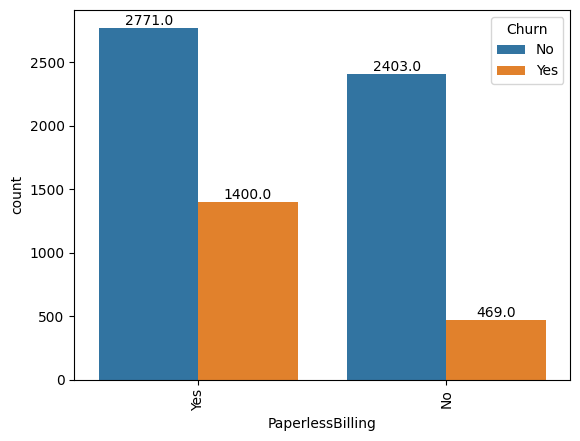

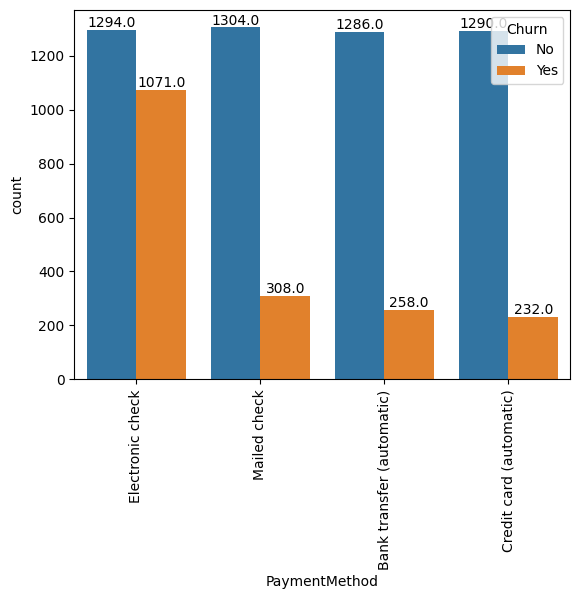

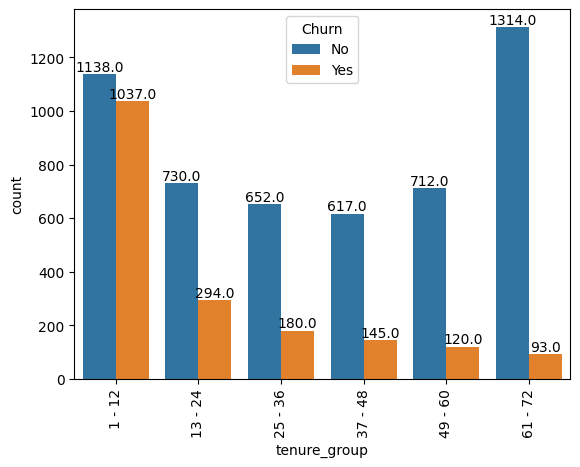

In [22]:
for i, predictor in enumerate(telco_df.drop(columns=['Churn', 'MonthlyCharges', 'TotalCharges'])):
  plt.figure(i)
  sns.countplot(telco_df, x=predictor, hue='Churn') #Churn is the legend
  # Add labels to the bars
  ax = plt.gca()
  for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
  plt.xticks(rotation=90)

                                    Churn rate 26.5%
#Univariate Analysis
##*Gender
Female-26.9%

Male-26.2%

UV insights-Not important column

##*Senior Citizen
Senior-41.7%

Not Senior-23.6%

UV insights-Senior Citizens are more likely to churn

##*Partner
yes-19.7%

No-32.9%

UV insights-Who are not partners are likely to churn

##*Dependents
yes-15.4%

No-31.2%

UV insights-Who are not dependents are likely to churn

##*Phone service
yes-26.7%

No-24.9%

UV insights-Who are not important

##*MultipleLines
No phone service-24.9%

No-25%

Yes-38.5%

UV insights-Who multiple lines are likely to churn

##*InternetService
Dsl-18.9%

Fiber optic-41.9%

N0-7.40%

UV insights-Who use fiber optics internet are more likely to churn

##*Online Security
No-47.7%

Yes-14.6%

No internet service-7.4%

UV insights-Who do not have online security are more likely to churn

##*Online Backup
Yes-21.5%

No-39.9%

No internet-7.40%

UV insights-Who don’t have online backup are likely to churn

##*Device Protection
No-41.6%

Yes-15.16%

No internet service-7.40%

UV insights-Who do not have device protection are more likely to churn

##*Techsupport
Yes-15.16%

No-41.6%

No internet service-7.40%

UV insights-Who don’t have techsupport  are more likely to churn

*Streaming TV
Yes-30%
No-33.5%
UV insights-Who do not stream TV are likely to churn

##*Streaming Movies
Yes-29.9%

No-33.5%

No internet-7.40%

UV insights-Who don’t stream movies are likely to churn

##*Contract
Month to month-42.7%

One year-11.26%

Two year-2.83%

UV insights-Who have month to month contract are more likely to churn

##*paperless billing
Yes-33.5%

No-16.33%

UV insights-Who are on paperless billing are likely to churn

##*Payment Method
Electronic check-45.3%

Mailed check-19.10%

Bank transfer-16.7%

Credit card-15.24%

UV insights-Who use electronic payment method are more likely to churn

##*tenure_group
1-12 =47.67%

13-24=28.7%

25-36=21.63%

37-48=19.02%

49-60=14.4%

61-72=6.6%

UV insights-Who tenure is from 1month-12 months are more likely to churn





